# Project 2: Pauli channel

In this project we will implement the general **Pauli channel** in qiskit. 

As an application, we will evaluate a quantity that is relevant in quantum thermodynamics, known as extractable work, trying to reproduce the result of the paper [*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y).

The most general single-qubit open quantum system model is the time-dependent Pauli channel. The master equation in this case takes the form
\begin{equation}
\frac{d\rho_{S} }{dt}(t)=\frac{1}{2}\sum_i\gamma_i(t)\left[\sigma_i\rho_{S}(t)\sigma_i-\rho_{S}(t)\right].
\end{equation}

Generally, the dynamics described by the master equation above is not phase-covariant [[1](#1)], except for the case in which $\gamma_x(t)=\gamma_y(t)$. Moreover, since the decay rates may take negative values, conditions for complete positivity must be imposed, and they are given in terms of a set of inequalities involving all the three decay rates, as one can see, e.g., from Ref. [[2](#2)].
<!--
**In Sec.~\ref{sec:discussion} we present the simulation of a specific form of time-dependent Pauli channel proposed in Ref.~\cite{Hall2014} and used as an example of eternal non-Markovianity, i.e.~an open quantum system dynamics for which the dynamical map is non-CP-divisible for all times $t$. More precisely, we use this experimental simulation to demonstrate a phenomenon predicted in Ref.~\cite{BognaWork}, namely the presence of oscillations in the extractable work. This shows an application of open quantum system simulation on the IBM Q Experience processors to fields other than quantum information theory, specifically quantum thermodynamics for the example here considered.** What? Is example Markovian or non-Markovian???? -->

At a specific time instant $t$, the Pauli channel can be written as
\begin{equation} 
 \mathcal{E} (\rho) = \sum_{i=0}^3 p_i \sigma_i \rho \sigma_i,
\end{equation}
 
with $0 \leq p_i \leq 1$ and $\sum_i p_i = 1$. The depolarizing channel is a special case of the Pauli channel where $p_1 = p_2 = p_3 = p/4$. 

It is possible to implement the general Pauli channel with just two ancillary qubits, by preparing them in the suitable entangled state. The first qubit acts as the control for a controlled-$X$ (CNOT) gate, and the second one for a controlled-$Y$. Notice that applying both an X and a Y gates is effectively equivalent to applying a Z gate.

The state $|\psi \rangle$ of the ancillae needed for the Pauli channel can be implemented by the following circuit:

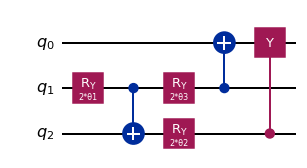

In [7]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.circuit import Parameter

#############################
#       Pauli channel       #
#############################

# Quantum register
q = QuantumRegister(3, name="q")

# Quantum circuit
pauli = QuantumCircuit(q)

# Pauli channel acting on q_2
## Qubit identification
system = 0
a_0 = 1
a_1 = 2

# ## Define rotation angles
theta_1 = Parameter('θ1')
theta_2 = Parameter('θ2')
theta_3 = Parameter('θ3')

## Construct circuit
pauli.ry(2*theta_1, q[a_0])
pauli.cx(q[a_0], q[a_1])
pauli.ry(2*theta_3, q[a_0])
pauli.ry(2*theta_2, q[a_1])
pauli.cx(q[a_0], q[system])
pauli.cy(q[a_1], q[system])

# Draw circuit
pauli.draw(output='mpl')

## Task 1 (1p)

The depolarizing channel is a special case of the Pauli channel where $p_1 = p_2 = p_3 = p/4$. It can thus be implemented using the circuit above. But why can't a general Pauli channel be implemented with the circuit used in Project 1, if we allow each of the three ancillary qubits to be rotated by a different angle $\theta$?

Find a counterexample of Pauli channel that can't be implemented with the circuit used in Project 1.



## Task 2 (2p)
The crucial part of the circuit implementation of the Pauli channel is the inversion of the system of equations 

\begin{equation}
    \begin{cases}
        p_0  = |\langle 00|\psi \rangle|^2 = (c_1 c_2 c_3 + s_1 s_2 s_3)^2 & \\
        p_1  = |\langle 01|\psi \rangle|^2 = (c_1 c_2 s_3 - s_1 s_2 c_3)^2 & \\
        p_2  = |\langle 10|\psi \rangle|^2 = (c_1 s_2 c_3 - s_1 c_2 s_3)^2 & \\
        p_3  = |\langle 11|\psi \rangle|^2 = (s_1 c_2 c_3 + c_1 s_2 s_3)^2 &
    \end{cases}
\end{equation}

where $c_i \equiv \cos \theta_i$ and $s_i \equiv \sin \theta_i$, that gives us the three angles $\theta_1$, $\theta_2$ and $\theta_3$.

The system allows for multiple solutions, but we just need to find one (we can restrict to angles between 0 and $2\pi$).

1. *Find such a solution, either analytically (e.g. by using Mathematica) or numerically (e.g. using `scipy.optimize`)*
2. *Implement a function that returns the circuit implementing the Pauli Channel for a list of values `[p_1, p_2, p_3]`.*

NOTE: Many solvers are not able to find a solution consistently or at all for 2.1. It can be helpful to provide an initial guess (e.g. random) and allow only solutions with a very low tolerance ($<10^{-10}$) to the solver. It can also help to provide the bounds $(0, 2\pi)$ and change between different minimization algorithms.

In [ ]:
def pauli_channel(q, p, system, pauli_ancillae):
    """
        Apply the Pauli channel to system with probabilities p
        
    Args:
    q (QuantumRegister): the quantum register for the circuit
    system (int): index of the system qubit
    pauli_ancillae (list): list of indices of the ancillary qubits
    p (list): list of probabilities [p_1, p_2, p_3] for the Pauli channel
    
    Returns:
    A QuantumCircuit implementing the Pauli channel
    """
    
    # Write code

## Task 3 (2p)

We are going to evaluate the amount of work that can be extracted by erasure in our system qubit A prepared in an initially entangled state with a quantum memory Q. This quantity is relevant in quantum thermodynamics. It was introduced in *L. del Rio et al., Nature 474, 61 (2011)* and also studied in the context of non-Markovian dynamics, [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989) (an experimental implementation on IBM Q devices is here: [*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y)).

We are going to implement a function that evaluates Eq. (4) of [*B. Bylicka et al., Sci. Rep. 6, 27989 (2016)*](https://www.nature.com/articles/srep27989). You can use the rescaled extractable work below.

$$\frac{W_{ex}(t)}{kT\ln{2}} = [n - S(A | Q)]$$

*For that, we first need a `conditional_entropy` function that takes a two-qubit state vector or density operator* and returns the conditional entropy $S(A|B) = S(AB) - S(B)$ where $S$ denotes the [von-Neumann entropy](https://en.wikipedia.org/wiki/Von_Neumann_entropy).

In [ ]:
# Suggested imports...
from qiskit.quantum_info import entropy, partial_trace

def conditional_entropy(state, qubit_a, qubit_b):
    """Conditional entropy S(A|B) = S(AB) - S(B)
    
    Args:
        state: a vector or density operator
        qubit_a: 0-based index of the qubit A
        qubit_b: 0-based index of the qubit B
        
    Returns:
        int: the conditional entropy
    """
    # Write code here

And now you can implement the `extractable_work` function, that also takes a two-qubit system and returns the amount of extractable work.

In [ ]:
def extractable_work(state, system_qubit, memory_qubit, n=1):
    """Extractable work from a two-qubit state
    =
    Cfr. Eq. (4) Bylicka et al., Sci. Rep. 6, 27989 (2016)
    
    Args:
        state: a vector or density operator
        system_qubit: index of the system qubit
        memory_qubit: index of the memory qubit
        n: number of system qubits
    """
    # Write code here

## Task 4 (5p)

We are now going to implement two different types of dynamics, i.e. functions that return the values of p as function of time. One is a non-CP-divisible map (see [Chapter 8 of Open Quantum Systems with Qiskit](https://matteoacrossi.github.io/open_quantum_systems_course/non-markovian_quantum_dynamics.html))

    p_ncp = [1/4 * (1 - np.exp(-2 * t * eta)), 
             1/4 * (1 - np.exp(-2 * t * eta)),
             1/4 * (1 + np.exp(-2 * t * eta) - 2 * np.exp(-t * eta) * np.cos(t * omega))]
         
and the other is eternally non-Markovian (cf. [*G. García-Pérez et al., npj Quantum Inf 6, 1 (2020)*](https://doi.org/10.1038/s41534-019-0235-y))

    p_enm = [1/4 * (1 - np.exp(-2 * t * eta)), 
             1/4 * (1 - np.exp(-2 * t * eta)),
             1/4 * (1 + np.exp(-2 * t * eta) - 2 * np.exp(-t * eta) * np.cosh(t * omega))]

1. Write the functions `p_ncp(t)` and `p_enm(t)` that return the circuit simulating the Pauli channel at time $t$ for the two dynamics above.
2. Write a circuit in which you prepare two qubits (the system and memory) in the $|\Psi^-\rangle = \frac{1}{\sqrt{2}}{(|01\rangle - |10\rangle)}$ state.
3. Let's use the following time steps and parameters for the dynamics.

        t_values = np.linspace(0, 3, 11)

        params_ncp = {'eta': 0.1, 'omega': 2.0}
        params_enm = {'eta': 1.0, 'omega': 0.5}

    write the circuits implementing the dynamics for each of the `t_values`.
   
4. For each circuit perform state tomography on a simulator, compute and plot the extractable work as a function of time for both dynamics. Execute the circuits using [`qiskit_experiments.framework.BatchExperiment`](https://qiskit.org/ecosystem/experiments/stubs/qiskit_experiments.framework.BatchExperiment.html#qiskit_experiments.framework.BatchExperiment) by providing a list of `StateTomography` instances. This way you can execute all the necessary circuits in one call, which can speed up the experiments when dealing with e.g. real devices.
5. Plot also the exact values for the extractable work for both dynamics.


## Optional Tasks

1. Use the circuit of the general Pauli channel to implement the depolarizing channel on the real machine, and compare the experimental outcome with the ones from the previous project. Which one has higher fidelities?

2. Run the code above on a real device and compare it with the simulation. See the solution of project 1 for help!